In [1]:
%pip install torch_geometric

  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
  Using cached aiohttp-3.11.13-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.7 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached aiohappyeyeballs-2.5.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached attrs-25.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached frozenlist-1.5.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached multidict-6.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.0 kB)
  Using cached propcache-0.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached yarl-1.18.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (69 kB)
  Using cached MarkupSaf

In [3]:
%pip install opencv-python


  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (63.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install torch

  Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl

In [8]:
%pip install torchvision


  Using cached torchvision-0.21.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
Using cached torchvision-0.21.0-cp311-cp311-manylinux1_x86_64.whl (7.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import cv2
import torch
import numpy as np
from PIL import Image
from torchvision import models, transforms
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Define image folder path
image_folder = r"/home/ronodeep/thesisfinal-1/IARCImageBankColpo"

# Define CNN model (ResNet for feature extraction)
model = models.resnet18(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove classification layer
model.eval()

# Image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Dictionary to store image features
image_features = {}

# Valid image extensions
valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

# Load images from folders
for case_id in sorted(os.listdir(image_folder)):
    case_path = os.path.join(image_folder, case_id)
    if os.path.isdir(case_path):
        print(f"Processing {case_id}...")
        for img_file in os.listdir(case_path):
            # Skip non-image files and Zone.Identifier files
            file_ext = os.path.splitext(img_file)[1].lower()
            if file_ext not in valid_extensions or "Zone.Identifier" in img_file:
                continue
                
            img_path = os.path.join(case_path, img_file)
            try:
                # Try using PIL directly instead of OpenCV
                img_pil = Image.open(img_path).convert('RGB')
                
                # Apply transformation
                img_transformed = transform(img_pil)
                img_transformed = img_transformed.unsqueeze(0)  # Add batch dimension

                with torch.no_grad():
                    feature = model(img_transformed).squeeze().numpy()  # Extract features

                image_features[img_path] = feature
                print(f"  Processed: {img_file}")
                
            except Exception as e:
                print(f"  Error processing {img_file}: {str(e)}")
                continue

print(f"Total features extracted: {len(image_features)}")

Processing Case 001...
  Processed: AAAW3.jpg
  Processed: AAAW2.jpg
  Processed: AAAW1.jpg
  Processed: AAAW4.jpg
Processing Case 002...
  Processed: AADE4.jpg
  Processed: AADE0.jpg
  Processed: AADE3.jpg
  Processed: AADE1.jpg
Processing Case 003...
  Processed: AADG0.jpg
  Processed: AADG1.jpg
  Processed: AADG2.jpg
  Processed: AADG3.jpg
Processing Case 004...
  Processed: AAEG0.jpg
  Processed: AAEG1.jpg
  Processed: AAEG2.jpg
Processing Case 005...
  Processed: AAER2.jpg
  Processed: AAER1.jpg
  Processed: AAER0.jpg
  Processed: AAER3.jpg
Processing Case 006...
  Processed: AAFU3.jpg
  Processed: AAFU0.jpg
  Processed: AAFU1.jpg
  Processed: AAFU2.jpg
  Processed: AAFU4.jpg
Processing Case 007...
  Processed: AAFY1.jpg
  Processed: AAFY4.jpg
  Processed: AAFY3.jpg
  Processed: AAFY0.jpg
Processing Case 008...
  Processed: AAFZ0.jpg
  Processed: AAFZ4.jpg
  Processed: AAFZ5.jpg
  Processed: AAFZ2.jpg
Processing Case 009...
  Processed: AAGB1.jpg
  Processed: AAGB0.jpg
  Processed

In [13]:
%pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [16]:
%pip install networkx


Note: you may need to restart the kernel to use updated packages.


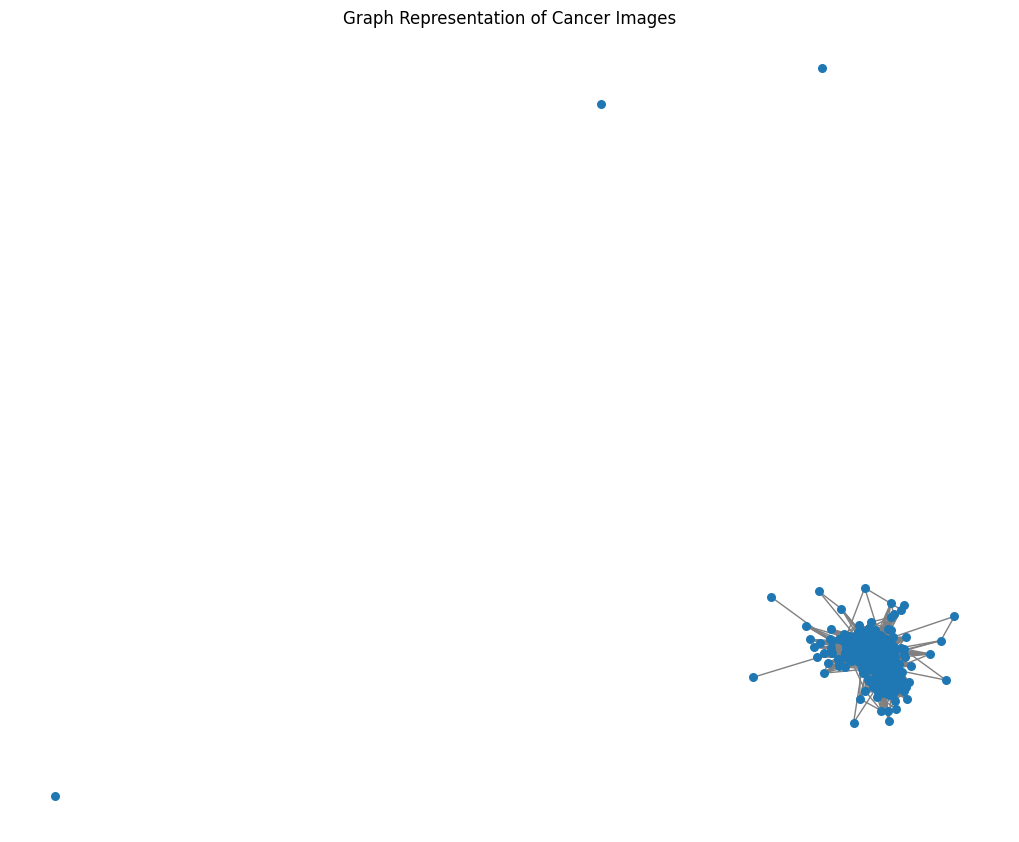

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# Create a Graph
G = nx.Graph()

# Add nodes
for img_path, feature in image_features.items():
    G.add_node(img_path, feature=feature)

# Compute edges based on similarity
image_paths = list(image_features.keys())
features = np.array(list(image_features.values()))

similarity_matrix = cosine_similarity(features)
threshold = 0.8  # Define a threshold for connectivity

for i in range(len(image_paths)):
    for j in range(i + 1, len(image_paths)):  # Avoid duplicate edges
        if similarity_matrix[i, j] > threshold:
            G.add_edge(image_paths[i], image_paths[j], weight=similarity_matrix[i, j])

# Visualize Graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=30, edge_color="gray")
plt.title("Graph Representation of Cancer Images")
plt.show()

In [12]:
import torch_geometric.utils as pyg_utils

# Convert NetworkX to PyG format
data = pyg_utils.from_networkx(G)

# Save graph dataset
torch.save(data, "cancer_graph_dataset.pt")

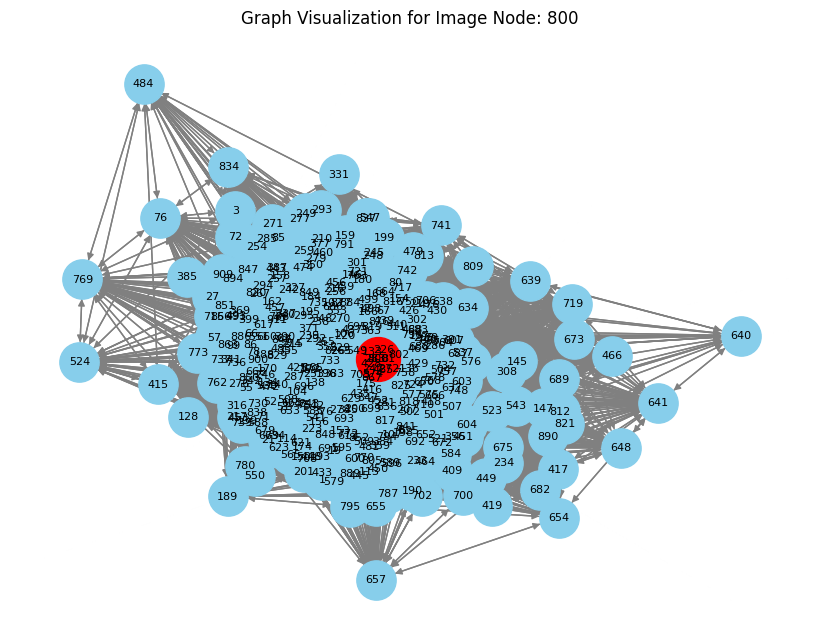

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx


# Open the .gml file with the 'ISO-8859-1' encoding
graph_file = torch.load("cancer_graph_dataset.pt",weights_only=False)
G = to_networkx(graph_file)

# Select a random node (image) or the first image node
sample_node = list(G.nodes)[800]  # First node in the graph

# Get neighbors of the selected node (images similar to the sample)
neighbors = list(G.neighbors(sample_node))

# Create a subgraph for visualization
subG = G.subgraph([sample_node] + neighbors)

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subG)  # Node positioning
nx.draw(subG, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=800, font_size=8)

# Highlight the main image node in red
nx.draw_networkx_nodes(subG, pos, nodelist=[sample_node], node_color="red", node_size=1000)

plt.title(f"Graph Visualization for Image Node: {sample_node}")
plt.show()


In [14]:
print(graph_file.num_nodes)
print(graph_file.num_edges)
print(graph_file.num_node_features)

913
298346
0
